In [1]:
#import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt

In [2]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt

In [3]:
import stpredictions

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [5]:
dataset_url = "https://www.kaggle.com/datasets/minbavel/cifar-100-images"
od.download(dataset_url) 

Skipping, found downloaded files in "./cifar-100-images" (use force=True to force download)


In [6]:
project_name = "ex1"

In [7]:
data_dir = './cifar-100-images/CIFAR100'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/TRAIN')
print(classes[:10])
print(len(classes))

['TEST', 'TRAIN']
['poppy', 'kangaroo', 'table', 'camel', 'cockroach', 'bowl', 'motorcycle', 'squirrel', 'willow_tree', 'wardrobe']
100


Training the dataset

In [8]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])

In [9]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

In [10]:
# Let's use batch size
batch_size = 400

In [11]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [12]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


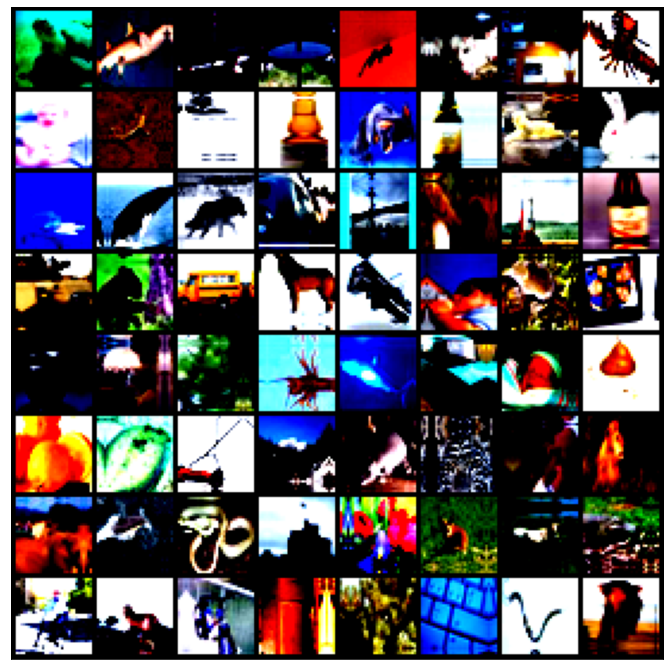

In [13]:
#show_batch(train_dl)

In [14]:
#Data transforms (normalization & data augmentation)

In [15]:
#Evaluating a single class for example "Man"
man_file = os.listdir(data_dir + '/TRAIN/man')
print("Nº of training examples for man: ", len(man_file))
print(man_file[:5])

Nº of training examples for man:  500
['man_s_001964.png', 'adam_s_001990.png', 'man_s_000430.png', 'abel_s_000495.png', 'man_s_000936.png']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from stpredictions.models.IOKR.model import IOKR
from stpredictions.datasets import load_bibtex

X, Y, _, _ = load_bibtex()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

clf = IOKR()
clf.verbose = 1
L = 1e-5
clf.fit(X=X_train, Y=Y_train, L=L)
Y_pred_test = clf.predict(X_test=X_test, Y_candidates=Y_test)
f1_test = f1_score(Y_pred_test, Y_test, average='samples')
print( "Test f1 score:", f1_test)

Fitting time: 15.791099786758423 in s
Decoding time: 2.8008530139923096 in s
Test f1 score: 0.305243514032123


In [20]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
 
# Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
# Check the shape of the array 配列の形を確認
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
 
# Number of data set samples データセットサンプル数
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
# Data format confirmation データ形式確認
print(type(x_test))
print(type(y_test[0]))

2022-08-04 02:13:57.374109: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-04 02:13:58.434906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-04 02:13:58.434953: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


169001437/169001437 [==============================] - 23s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train samples
10000 test samples
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/daniel/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


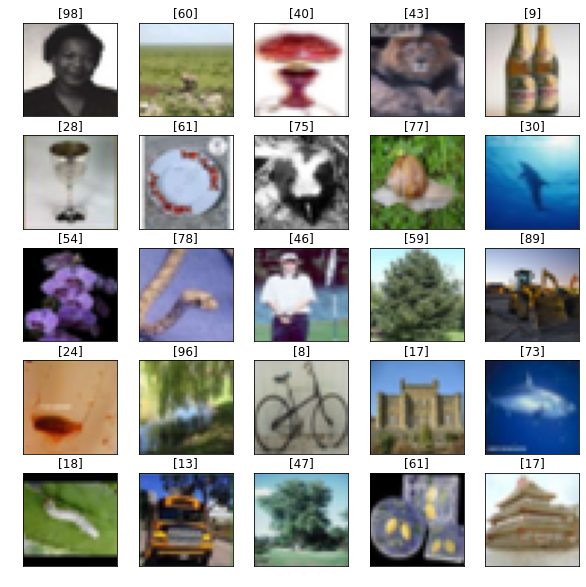

In [21]:
# Show sample random image 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
    # Show correct label
    plt.title(y_train[rand_num])
 
plt.show()

In [22]:
# Prediction for 10000 test image class using predict_classes()
img_pred = model.predict_classes(x_test)
 
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test_img[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
    # Image Prediction pred
    plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num],y_test_img[rand_num]))
 
plt.show()

NameError: name 'model' is not defined